# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
df=pd.read_csv("gld_price_data.csv")

In [4]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
# print first 5 rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
# Print the last % rows in the DataFrame
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
# Number of rows and columns
df.shape

(2290, 6)

In [8]:
# Getting some basic iformation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Checking the number of Missing Values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Getting the statistical measure of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#Correlation:
#1) Positive Correlation
#2) Negative Correlation

In [11]:
df.select_dtypes(include='number').corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [12]:
df_float = df.select_dtypes(include='float')


In [13]:
correlation= df_float.corr()

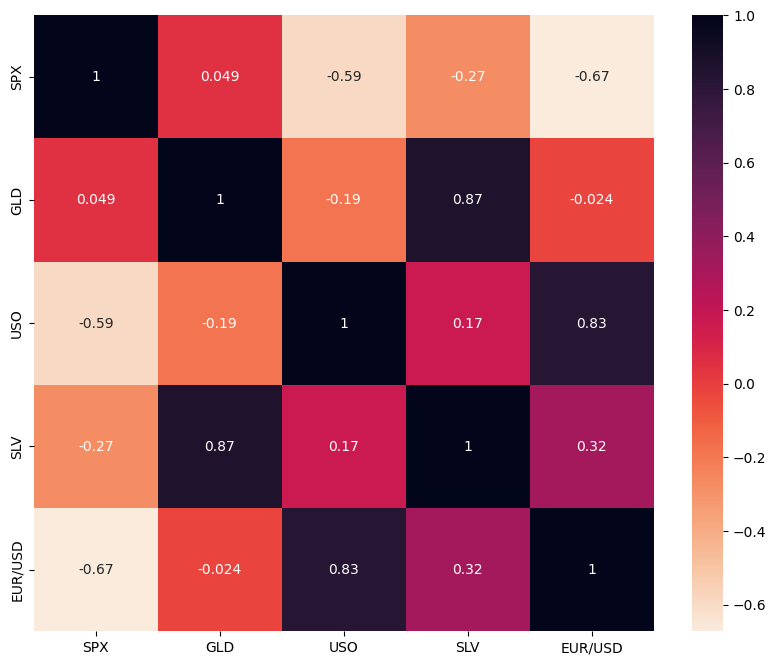

In [14]:
# Constructing a heatmap to u derstand the coreelation
plt.figure(figsize=(10,8))
sns.heatmap(df_float.corr(),annot=True,cmap="rocket_r")
plt.show()

In [15]:
# Correlation value of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

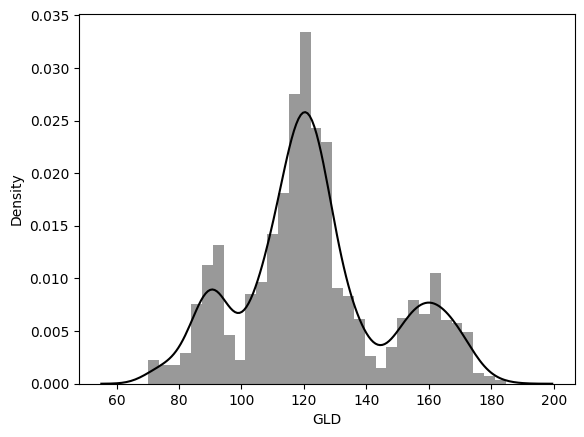

In [16]:
# Checking the distribution of the GLD Price
sns.distplot(df["GLD"],color="black")

Splitting the Features and the Target

In [17]:
X=df.drop(["Date","GLD"],axis=1)
Y=df["GLD"]

In [18]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [19]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into Training data and Testing Data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [21]:
regressor= RandomForestRegressor(n_estimators=100)

In [22]:
# Training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:

regressor.score(X_train,Y_train)

0.99863233019698

In [24]:
# Prediction on Test Data
y_predtest=regressor.predict(X_test)

In [26]:
y_predtest

array([113.65450003, 147.66970132, 140.71679883, 112.69090171,
       113.7313995 ,  95.64699945, 111.94939958,  93.36999899,
       120.90090033, 127.08099957, 147.82519922, 120.40409894,
       119.13130073,  88.22430077,  96.19640044,  92.68779846,
       116.68340061,  88.95389918, 125.17660086, 114.77460017,
       119.1348996 , 153.10260185, 122.63169822, 120.0583996 ,
       171.24049973, 108.50859813, 120.43120038,  87.14919849,
        87.91600059,  88.5052992 , 121.16960019, 154.27950196,
       150.74789901, 125.84090061, 126.73829999,  90.76939847,
       159.36489935, 121.54070151, 106.79750087, 144.29919772,
        92.45089984, 127.61790083, 117.77120069, 152.20060101,
       119.27619928,  91.31390134,  80.63769955, 120.17300184,
       133.0323004 , 118.99749919, 127.36750056, 165.81150006,
       153.54420038,  92.72049955, 148.91960059, 151.90059895,
       113.05200039, 113.18530043,  87.43979938, 127.75099903,
       125.05530047, 152.03110247, 114.44359956, 110.70

In [27]:
# R squared error
r2=r2_score(Y_test,y_predtest)

print("R2 Score:",r2)

R2 Score: 0.9881118656186456


Compare the Actual value with Prediction value

In [28]:
Y_test=list(Y_test)

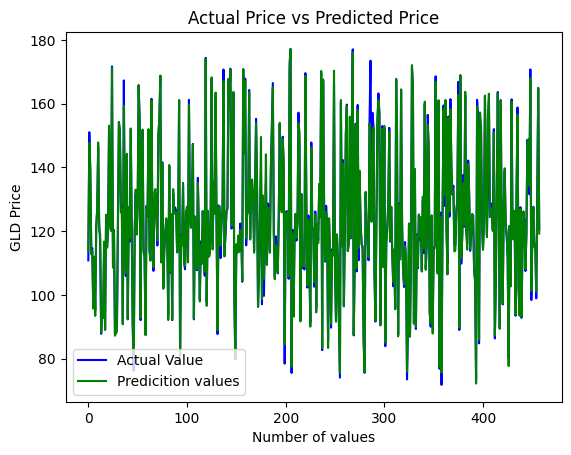

In [33]:
plt.plot(Y_test,color="blue",label="Actual Value")
plt.plot(y_predtest, color="green", label="Predicition values")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

In [2]:
!jupyter nbconvert --to html House_Price_Prediction.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'House_Price_Prediction.ipynb' matched no files
Exception ignored on threading shutdown:
Traceback (most recent call last):
  File "C:\Users\sarth\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1524, in _shutdown
    if _main_thread._handle.is_done() and _is_main_interpreter():
SystemError: <method 'is_done' of '_thread._ThreadHandle' objects> returned a result with an exception set
